# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [109]:
# Import your libraries
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binom


# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [93]:
"""
The function np.random.normal is used to calculate an array normally distributted 
given the mean, the standard deviation and the size of the array"
"""
a=np.random.normal(50,5,10)
b=np.random.normal(50,5,50)
c=np.random.normal(50,5,500)
d=np.random.normal(50,5,5000)

In [94]:
'''
We now use the normaltest from scipy to check if our normal distributions are 
really normal.
'''

print(
scipy.stats.normaltest(a)[:],"\n",
scipy.stats.normaltest(b)[:],"\n",
scipy.stats.normaltest(c)[:],"\n",
scipy.stats.normaltest(d)[:])

(1.3810179095881299, 0.5013208544729706) 
 (0.6942325191564575, 0.706723160144904) 
 (2.1314773853337314, 0.34447330085896705) 
 (0.8043656808204909, 0.6688584401578961)


#### Interpret the normaltest results and make your observations.

In [96]:
# Explain the test results here
'''
The null hypothesis is whether the arrays are normally distributed.
We assume that 
We assume that our alpha is 0.05, this means that if p is under 0,05 we will reject 
the null hypothesis, meaning that the arrays are not normally distributed. 
The higher the p the more probably our array is normally distributed.
'''

alpha=0.05
[True for i in [a,b,c,d] if i[1]>alpha]

[True, True, True, True]

In [ ]:
'''
We have received True for all samples, that means that we can't reject the null 
hypothesis in any of the cases. We can assume our samples are normally distributed
'''

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

Text(0.5, 0.98, 'Normal Distributions')

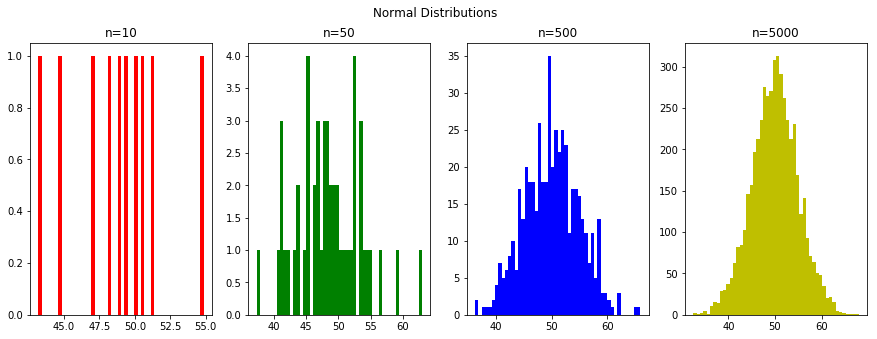

In [78]:
"""
 Subplots is used to generate a figure with 4 cells, each cell will represent the
 histogram of each normal distribuition we generate
"""

fig,ax=plt.subplots(1,4, figsize=(15,5))
ax[0].hist(a,color="r",bins=50)
ax[1].hist(b,color="g",bins=50)
ax[2].hist(c,color="b",bins=50)
ax[3].hist(d,color="y",bins=50)
ax[0].set_title("n=10")
ax[1].set_title("n=50")
ax[2].set_title("n=500")
ax[3].set_title("n=5000")
fig.suptitle("Normal Distributions")


#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here

'''
The central limit theorem says that given a number of random samples from a
population, the distribution of means of these samples will define a normal 
distribution. The larger number of samples we take, the more accurate the normal 
is, it also says that the larger the samples are the more accurate the normal 
distribution. The mean in the sampling distribution of the mean and the mean in the
parent distribution will be the same with an infinite number of samples.
'''

'''
The above samples do not have any relationship with the Central Limit Theorem since the 
distributions we observe are not sample distributions of the mean but simply sample 
distributions based on samples obtained with a method that returns arrays normally 
distributed. With this logic the larger number of items in the array the more accurate
the normal distribution will be.
'''


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

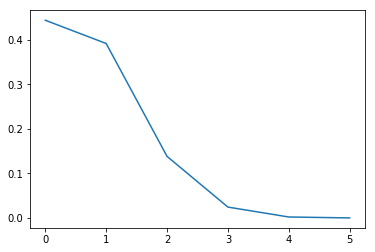

In [115]:
# Your code here
n=5
p=0.15
k=range(0,n+1)
binom=scipy.stats.binom.pmf(k,n,p)

plt.plot(k,binom)

#### Explain what you observe from the plot above

In [ ]:
# Your comment here

#### Now plot PMP with 50, 500, and 5000 visitors.

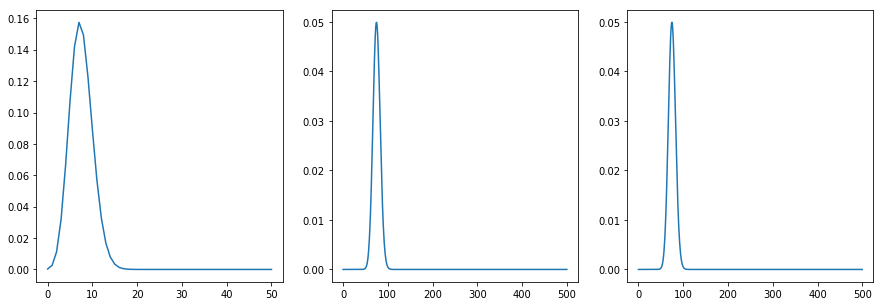

In [121]:
# Yon=5
inputs=[50,500,500]
fig,ax=plt.subplots(1,len(inputs), figsize=(15,5))
for i in range(len(inputs)):
    n=inputs[i]
    p=0.15
    k=range(0,n+1)
    binom=scipy.stats.binom.pmf(k,n,p)

    ax[i].plot(k,binom)

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [146]:
# Your code here
mean=300
size=1000#This is chosen with own criteria
poisson=scipy.stats.poisson.rvs(mean, size=size)
#print(np.mean(poisson))
#print(poisson)

pv=320

p=(sum(poisson==320))/len(poisson)
print(p)

0.007


#### What is the probability of getting 60 visits?

In [ ]:
# Your code here

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

In [ ]:
# your code here
